# 1. Imports

In [ ]:
import sys
from pathlib import Path

# Add project root (parent of "electricity") to sys.path

sys.path.append("..")   # go up one level to project root


from electricity.load import Loading
from electricity.preprocessing import Preprocessor


In [41]:
loader = Loading(filepath="complete_dataset.csv", return_X_y=False)

In [42]:
# 3. Load the dataframe
df = loader.load_data()

In [43]:
df

,RRP,school_day,holiday,RRP_t_minus_1,demand_t_minus_1,min_temperature_t_minus_1,max_temperature_t_minus_1,solar_exposure_t_minus_1,rainfall_t_minus_1
date,,,,,,,,,
2015-01-02,33.138988,0,0,25.633696,99635.030,13.3,26.9,23.6,0.0
2015-01-03,34.564855,0,0,33.138988,129606.010,15.4,38.8,26.8,0.0
2015-01-04,25.005560,0,0,34.564855,142300.540,20.0,38.2,26.5,0.0
2015-01-05,26.724176,0,0,25.005560,104330.715,16.3,21.4,25.2,4.2
2015-01-06,31.282311,0,0,26.724176,118132.200,15.0,22.0,30.7,0.0
...,...,...,...,...,...,...,...,...,...
2020-10-02,-6.076028,0,0,34.654671,106641.790,9.4,19.5,21.2,1.8
2020-10-03,-1.983471,0,0,-6.076028,99585.835,12.8,26.0,22.0,0.0
2020-10-04,25.008614,0,0,-1.983471,92277.025,17.4,29.4,19.8,0.0


In [44]:
import numpy as np
import pandas as pd

In [45]:
X = df.drop(columns="RRP")
y = df["RRP"]

In [46]:
X.shape

(2105, 8)

In [47]:
# X_train, X_test: (N, T, F) windows for your RNN
# date_array: shape (N, T) with np.datetime64 for each timestep (preferred)
pre = Preprocessor(filepath=".", date_col="date", target_col="RRP")
   # OR: pre.set_rnn_dates(date_feature_index=idx)
pipe = pre.build_pipeline()


In [48]:
pipe

,steps,"[('date_features', ...), ('pre', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,date_col,'date'
,transformers,"[('pipeline-1', ...), ('pipeline-2', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False


In [49]:

pipe.fit(X)      # -> (N, T, F_out)
X_preproc = pipe.transform(X)

:mag_right: CorrelationSelector dropped 6 features: ['pipeline-1__week', 'pipeline-1__dayofyear', 'pipeline-1__week_sin', 'pipeline-1__week_cos', 'pipeline-1__doy_sin', 'pipeline-1__doy_cos']


In [50]:
X_preproc.shape

(2105, 13)

In [68]:
X_preproc

,pipeline-1__school_day,pipeline-1__holiday,pipeline-1__RRP_t_minus_1,pipeline-1__demand_t_minus_1,pipeline-1__min_temperature_t_minus_1,pipeline-1__max_temperature_t_minus_1,pipeline-1__solar_exposure_t_minus_1,pipeline-1__rainfall_t_minus_1,pipeline-1__year,pipeline-1__month,pipeline-1__dayofweek,pipeline-1__month_sin,pipeline-1__month_cos
date,,,,,,,,,,,,,
2015-01-02,-1.0,0.0,-0.725531,-0.973159,0.327869,0.939759,0.868,0.00,-0.666667,-0.833333,0.25,0.288675,0.633975
2015-01-03,-1.0,0.0,-0.592395,0.489688,0.672131,2.373494,1.124,0.00,-0.666667,-0.833333,0.50,0.288675,0.633975
2015-01-04,-1.0,0.0,-0.567101,1.109293,1.426230,2.301205,1.100,0.00,-0.666667,-0.833333,0.75,0.288675,0.633975
2015-01-05,-1.0,0.0,-0.736674,-0.743968,0.819672,0.277108,0.996,5.25,-0.666667,-0.833333,-0.75,0.288675,0.633975
2015-01-06,-1.0,0.0,-0.706187,-0.070334,0.606557,0.349398,1.436,0.00,-0.666667,-0.833333,-0.50,0.288675,0.633975
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-02,-1.0,0.0,-0.565508,-0.631167,-0.311475,0.048193,0.676,2.25,1.000000,0.666667,0.25,-0.500000,0.366025
2020-10-03,-1.0,0.0,-1.288032,-0.975560,0.245902,0.831325,0.740,0.00,1.000000,0.666667,0.50,-0.500000,0.366025
2020-10-04,-1.0,0.0,-1.215434,-1.332294,1.000000,1.240964,0.564,0.00,1.000000,0.666667,0.75,-0.500000,0.366025


In [ ]:
df = X_preproc.join(y)

In [70]:
train_size = 0.6
index = round(train_size*df.shape[0])

df_train = df.iloc[:index]
df_test = df.iloc[index:]

In [71]:
df_train.shape

(1263, 14)

In [72]:
from typing import Dict, List, Tuple, Sequence


In [73]:
TARGET = 'RRP'

def get_Xi_yi(
    dataset: pd.DataFrame,
    input_length: int,
    output_length: int,
    random: bool = True,
    start_index: int = None
) -> Tuple[pd.DataFrame]:
    """
    Returns one sequence (X_i, y_i) from the dataset, either randomly or at a specified index.

    Args:
        dataset (pd.DataFrame): The dataset to sample from.
        input_length (int): Length of input sequence.
        output_length (int): Length of output sequence.
        random (bool): If True, select randomly. If False, use start_index.
        start_index (int, optional): If random is False, use this as the starting index.

    Returns:
        Tuple[pd.DataFrame]: A tuple of two dataframes (X_i, y_i)
    """
    first_possible_start = 0
    last_possible_start = len(dataset) - (input_length + output_length) + 1

    if last_possible_start <= 0:
        raise ValueError("Not enough data to create a sequence with the given input and output lengths.")

    if random:
        random_start = np.random.randint(first_possible_start, last_possible_start)
    else:
        if start_index is None:
            raise ValueError("start_index must be provided when random is False.")
        if not (first_possible_start <= start_index < last_possible_start):
            raise ValueError(f"start_index must be in [{first_possible_start}, {last_possible_start-1}]")
        random_start = start_index

    X_i = dataset.iloc[random_start:random_start + input_length]
    y_i = dataset.iloc[random_start + input_length:
                      random_start + input_length + output_length][[TARGET]]

    return (X_i, y_i)


def get_X_y(
    dataset: pd.DataFrame,
    input_length: int,
    output_length: int,
    number_of_sequences: int = None,
    random: bool = False
) -> Tuple[np.array]:
    """
    Generate X and y based on the number of desired sequences of the given input_length and output_length.
    If random is False, sequences are taken sequentially to cover the full dataframe (up to number_of_sequences or max possible).
    If number_of_sequences is None, use the maximum possible number of sequences.

    Args:
        dataset (pd.DataFrame): Fold dataframe
        input_length (int): Length of each X_i
        output_length (int): Length of each y_i
        number_of_sequences (int, optional): The number of X_i and y_i pairs to include. If None, use max possible.
        random (bool): If True, sample randomly. If False, sample sequentially.

    Returns:
        Tuple[np.array]: A tuple of numpy arrays (X, y)
    """
    X, y = [], []

    first_possible_start = 0
    last_possible_start = len(dataset) - (input_length + output_length) + 1

    if last_possible_start <= 0:
        raise ValueError("Not enough data to create sequences with the given input and output lengths.")

    max_possible_sequences = last_possible_start

    if number_of_sequences is None:
        n_sequences = max_possible_sequences
    else:
        n_sequences = min(number_of_sequences, max_possible_sequences)

    if random:
        for i in range(n_sequences):
            Xi, yi = get_Xi_yi(dataset, input_length, output_length, random=True)
            X.append(Xi)
            y.append(yi)
    else:
        # Sequential, non-overlapping (or overlapping) windows
        for idx in range(first_possible_start, first_possible_start + n_sequences):
            Xi, yi = get_Xi_yi(dataset, input_length, output_length, random=False, start_index=idx)
            X.append(Xi)
            y.append(yi)

    return np.array(X), np.array(y)

In [74]:
data_train = get_X_y(df_train, 60, 1)
data_test = get_X_y(df_test, 60, 1)

In [75]:
X_train = data_train[0]
y_train = data_train[1]
X_test = data_test[0]
y_test = data_test[1]

In [76]:
# --- Notebook Cell 3: Simple model with unified preprocessing (LinearRegression + TS CV) ---
from electricity.preprocessing import Preprocessor
# Build preprocessing + model pipeline.
# Preprocessor will add date/cyclical features, impute/scale/one-hot, and prune highly correlated features.

In [77]:
import pandas as pd

In [78]:
from electricity.models import _tscv_scores
from sklearn.ensemble import RandomForestRegressor


In [79]:
from sklearn.model_selection import TimeSeriesSplit

In [80]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers


In [81]:
from tensorflow.keras.callbacks import EarlyStopping


In [82]:
X_train[0]

array([[-1.00000000e+00,  0.00000000e+00, -7.25531370e-01,
        -9.73158829e-01,  3.27868852e-01,  9.39759036e-01,
         8.68000000e-01,  0.00000000e+00, -6.66666667e-01,
        -8.33333333e-01,  2.50000000e-01,  2.88675135e-01,
         6.33974596e-01,  3.31389876e+01],
       [-1.00000000e+00,  0.00000000e+00, -5.92394503e-01,
         4.89688290e-01,  6.72131148e-01,  2.37349398e+00,
         1.12400000e+00,  0.00000000e+00, -6.66666667e-01,
        -8.33333333e-01,  5.00000000e-01,  2.88675135e-01,
         6.33974596e-01,  3.45648548e+01],
       [-1.00000000e+00,  0.00000000e+00, -5.67100947e-01,
         1.10929288e+00,  1.42622951e+00,  2.30120482e+00,
         1.10000000e+00,  0.00000000e+00, -6.66666667e-01,
        -8.33333333e-01,  7.50000000e-01,  2.88675135e-01,
         6.33974596e-01,  2.50055602e+01],
       [-1.00000000e+00,  0.00000000e+00, -7.36673920e-01,
        -7.43968149e-01,  8.19672131e-01,  2.77108434e-01,
         9.96000000e-01,  5.25000000e+00, -6.

In [ ]:
X_train = X_train.astype(np.float32)
y_train  = np.asarray(y_train).astype(np.float32)

X_test = X_test.astype(np.float32)
y_test  = np.asarray(y_test).astype(np.float32)


In [84]:
X_train

array([[[-1.0000000e+00,  0.0000000e+00, -7.2553140e-01, ...,
          2.8867513e-01,  6.3397461e-01,  3.3138988e+01],
        [-1.0000000e+00,  0.0000000e+00, -5.9239453e-01, ...,
          2.8867513e-01,  6.3397461e-01,  3.4564854e+01],
        [-1.0000000e+00,  0.0000000e+00, -5.6710094e-01, ...,
          2.8867513e-01,  6.3397461e-01,  2.5005560e+01],
        ...,
        [ 0.0000000e+00,  0.0000000e+00, -5.3562903e-01, ...,
          5.0000000e-01,  3.6602542e-01,  2.5143131e+01],
        [ 0.0000000e+00,  0.0000000e+00, -7.3423356e-01, ...,
          5.7735026e-01,  1.7930074e-16,  2.4586147e+01],
        [ 0.0000000e+00,  0.0000000e+00, -7.4411392e-01, ...,
          5.7735026e-01,  1.7930074e-16,  3.3166527e+01]],

       [[-1.0000000e+00,  0.0000000e+00, -5.9239453e-01, ...,
          2.8867513e-01,  6.3397461e-01,  3.4564854e+01],
        [-1.0000000e+00,  0.0000000e+00, -5.6710094e-01, ...,
          2.8867513e-01,  6.3397461e-01,  2.5005560e+01],
        [-1.0000000e+00, 

In [ ]:
es = EarlyStopping(patience=10, restore_best_weights=True)
model = Sequential()
model.add(layers.LSTM(units=100, return_sequences=True))
model.add(layers.LSTM(units=100))
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(50, activation="relu"))
model.add(layers.Dense(1, activation="linear"))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
history = model.fit(X_train, y_train, epochs=1000, callbacks=[es], validation_split=0.2, batch_size=32, verbose=1)

Epoch 1/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 3937.2334 - mae: 48.6449 - val_loss: 11792.9277 - val_mae: 59.9539
Epoch 2/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1641.2345 - mae: 31.0288 - val_loss: 9430.7441 - val_mae: 36.1618
Epoch 3/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1508.5161 - mae: 29.5232 - val_loss: 9388.2900 - val_mae: 35.6615
Epoch 4/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1345.9932 - mae: 26.8141 - val_loss: 8684.9688 - val_mae: 26.6072
Epoch 5/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 747.0430 - mae: 15.7853 - val_loss: 7963.6187 - val_mae: 24.5869
Epoch 6/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 626.9643 - mae: 13.6847 - val_loss: 8014.5269 - val_mae: 22.3544
Epoch 7/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 609.7468 - mae: 13.3103 - val_loss: 7825.1953 - val_mae: 22.7037
Epoch 8/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 595.4858 - mae: 12.7837 - val_loss: 7820.6621 - val_

In [126]:
def calculate_aic(model, X, y_true):
    """
    Calculate AIC for a trained Keras regression model.
    """
    # Predictions
    y_pred = model.predict(X, verbose=0).reshape(-1)
    y_true = y_true.reshape(-1)

    n = len(y_true)  # number of samples
    k = np.sum([K.count_params(w) for w in model.trainable_weights])  # number of params

    # Residual Sum of Squares
    rss = np.sum((y_true - y_pred) ** 2)

    # AIC formula for Gaussian likelihood
    aic = n * np.log(rss / n) + 2 * k
    return aic

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras import layers, Sequential
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=10, restore_best_weights=True)

model = Sequential()

# First LSTM layer with dropout + L2 regularization + batch norm
model.add(layers.LSTM(
    units=100,
    return_sequences=True,
    kernel_regularizer=regularizers.l2(0.001)
))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

# Second LSTM layer
model.add(layers.LSTM(
    units=100,
    kernel_regularizer=regularizers.l2(0.001)
))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

# Dense layers with regularization + batch norm
model.add(layers.Dense(100, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Dense(50, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

# Output layer
model.add(layers.Dense(1, activation="linear"))

# Compile
model.compile(loss="mse", optimizer="adam", metrics=["mae"])

# Train
history = model.fit(
    X_train, y_train,
    epochs=1000,
    callbacks=[es],
    validation_split=0.2,
    batch_size=32,
    verbose=1
)


Epoch 1/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 4841.6450 - mae: 59.5527 - val_loss: 17228.0332 - val_mae: 95.0390
Epoch 2/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4650.2349 - mae: 59.1723 - val_loss: 17117.1680 - val_mae: 94.5068
Epoch 3/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4508.3418 - mae: 58.7483 - val_loss: 16926.5645 - val_mae: 93.5553
Epoch 4/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4362.4033 - mae: 58.1843 - val_loss: 16806.6562 - val_mae: 93.0482
Epoch 5/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4209.4019 - mae: 57.4967 - val_loss: 15839.7822 - val_mae: 87.9915
Epoch 6/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4021.7141 - mae: 56.6044 - val_loss: 15346.7744 - val_mae: 85.1884
Epoch 7/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3887.6936 - mae: 55.6702 - val_loss: 14634.2705 - val_mae: 81.0181
Epoch 8/1000
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3713.5088 - mae: 54.6115 - val_loss: 14520.

In [129]:
import numpy as np
from tensorflow.keras import backend as K

aic_value = calculate_aic(model, X_test, y_test)
print("AIC:", aic_value)

AIC: 292860.5546875


In [ ]:
model.evaluate(X_test, y_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 38480.0898 - mae: 31.1735


[38480.08984375, 31.173519134521484]

In [122]:
import matplotlib.pyplot as plt

In [123]:
y_pred = model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


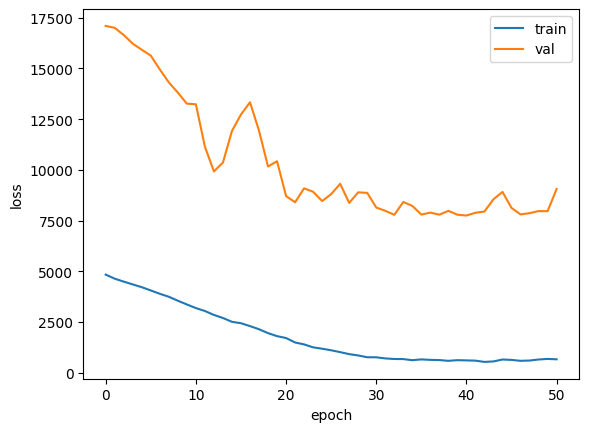

In [124]:
plt.plot(history.history['loss'])
plt.plot(history.history.get('val_loss'))
plt.legend(['train','val'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

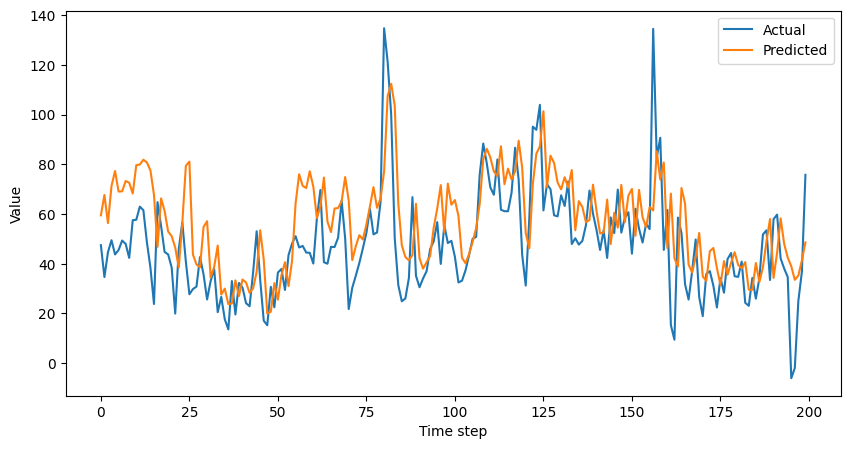

In [125]:
y_true = np.array(y_test).reshape(-1)[-200:]
y_hat  = np.array(y_pred).reshape(-1)[-200:]

plt.figure(figsize=(10,5))
plt.plot(y_true, label="Actual")
plt.plot(y_hat, label="Predicted")
plt.xlabel("Time step")
plt.ylabel("Value")
plt.legend()
plt.show()

In [106]:
model.save('rnn_model.keras')

In [107]:
model = tf.keras.models.load_model('rnn_model.keras')

In [108]:
model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[ 88.92616 ],
       [ 79.96998 ],
       [ 51.981438],
       [ 63.793945],
       [ 99.84944 ],
       [109.90189 ],
       [100.16744 ],
       [ 91.400116],
       [ 94.73973 ],
       [103.30705 ],
       [100.48253 ],
       [102.68361 ],
       [110.72386 ],
       [107.89102 ],
       [ 96.59494 ],
       [106.85871 ],
       [100.92869 ],
       [118.98252 ],
       [125.45019 ],
       [114.52053 ],
       [105.128845],
       [118.342384],
       [127.501976],
       [113.6904  ],
       [ 80.99309 ],
       [ 98.84008 ],
       [ 77.59537 ],
       [ 88.71068 ],
       [ 86.947655],
       [ 53.684055],
       [ 44.113235],
       [ 88.66311 ],
       [ 84.42079 ],
       [ 86.765015],
       [ 92.6879  ],
       [103.095215],
       [103.39711 ],
       [ 89.13483 ],
       [ 88.25372 ],
       [ 96.626045],
       [108.56601 ],
       [111.38546 ],
       [100.74111 ],
       [ 94.039024],
       [ 91.5588  ],
       [ 92.61168 ],
       [106.28608 ],
       [102.5